<a href="https://colab.research.google.com/github/cam2149/MachinelearningI/blob/main/Examen3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada

## Aprendizaje Automatico 1

## Examen 3

### Integrantes

- Andres Felipe Borrero
- Yesid Castelblanco
- Nicolas Colmenares
- Carlos Alberto Martinez

### **Profesores**

- Santiago Ortiz
- Henry Velasco

**Notas:**
-	Todas las respuestas, gráficas, tablas y operaciones deben ser debidamente justificadas.
-	La información que sea obtenida de alguna fuente debe ser citada y referenciada en el documento a entregar.


In [100]:
# Importar librería pandas y numpy
# Pandas es una librería de Python que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento
import pandas as pd
# NumPy es una librería de Python que proporciona estructuras de datos y operaciones matemáticas de alto rendimiento.
import numpy as np
#Matplotlib.pyplot es una librería de Python que proporciona herramientas de visualización y gráficos de alta calidad.
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
#Seaborn es una librería de Python que proporciona herramientas de visualización y análisis de datos de alta calidad.
import seaborn as sns

#métricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tqdm.auto import tqdm
import time

#Modelos

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

#sns.set(color_codes=True) es un método de la librería Seaborn que establece los códigos de color predeterminados para los gráficos y diagramas. Cuando se establece color_codes=True, Seaborn utiliza una paleta de colores predefinida y asigna un código de color a cada categoría o variable en los gráficos y diagramas.
sns.set(color_codes=True)
#Cuando se establece rc={'figure.figsize':(10,6)}, Seaborn crea figuras con un tamaño de 10 unidades de ancho y 6 unidades de alto.
sns.set(rc={'figure.figsize':(10,6)})
import warnings
warnings.filterwarnings('ignore')

# Ejercicio 1

1)	Considere el conjunto de datos *“Boston Housing Data”* presentados en Harrison and Rubinfeld (1978). Defina como variable respuesta a la columna *MEDV*. Realice una partición 80-20, donde el primer 80 % de los datos son datos de entrenamiento y el restante 20 % son datos para prueba.

Genere los modelos de regresión por regularización **Ridge, LASSO** y **Elastic-Net** para los datos de entrenamiento. Encuentre los valores óptimos de α∗ y λ∗ junto a su respectiva gráfica de evolución de los coeficientes de regresión. Compare los modelos en términos de la selección de variables, interprete los coeficientes y escriba la ecuación ajustada de regresión para cada caso. Finalmente, realice una predicción con las observaciones de prueba y determine cual de los tres modelos es el mejor en capacidad predictiva **(RMSE)**.


In [101]:
# Instead of using load_boston, fetch the dataset directly from the source:
data_url = "https://github.com/cam2149/MachinelearningI/raw/32a4b5e8d5b784f79f7f55be8a2e6fbbfb61ccba/boston.csv"
dfBoston = pd.read_csv(data_url, sep="\s+", header=None)


In [102]:

header_row = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dfBoston.columns = header_row
(dfBoston.head())


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [103]:
# Mostrar los primeros 5 datos del DataFrame
print("Primeros 5 datos:")
print(dfBoston.head())

# Mostrar los últimos 5 datos del DataFrame
print("\nÚltimos 5 datos:")
print(dfBoston.tail())

Primeros 5 datos:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Últimos 5 datos:
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959  0.0  11.93 

In [104]:
dfBoston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Dimensiones del conjunto de entrenamiento: (404, 13) (404,)
Dimensiones del conjunto de prueba: (102, 13) (102,)


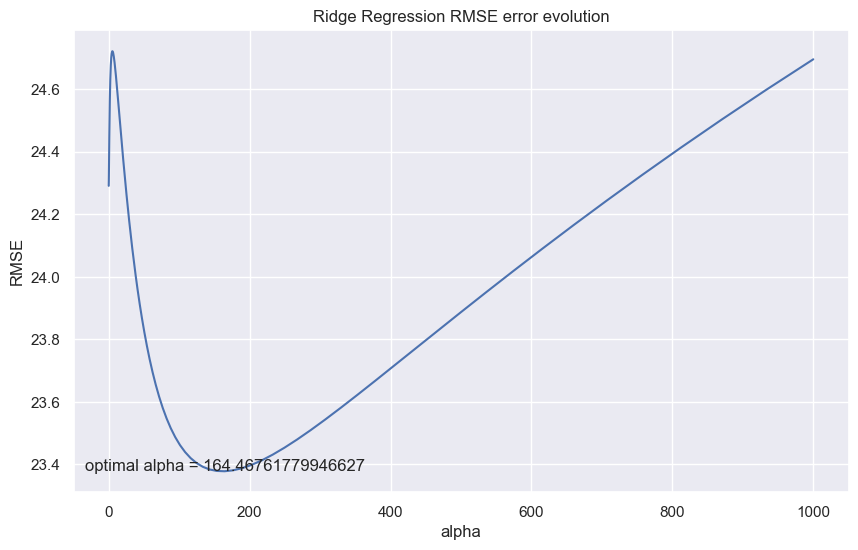

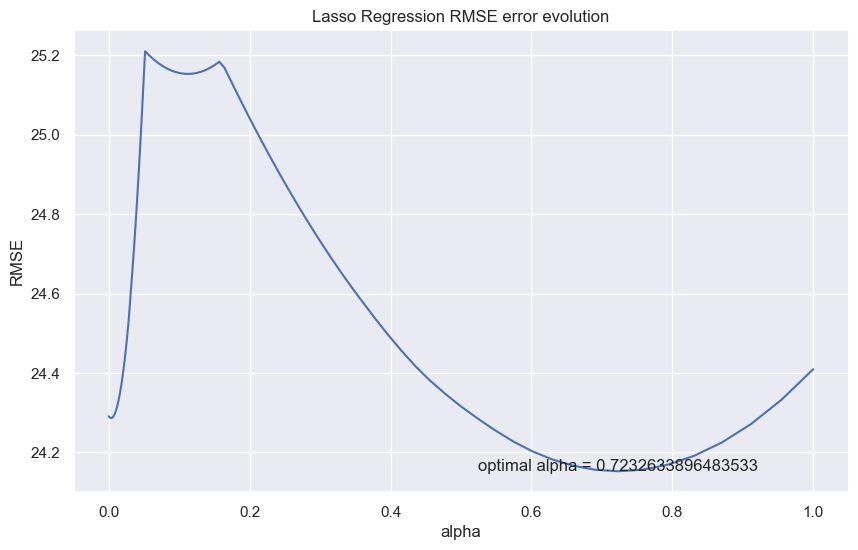

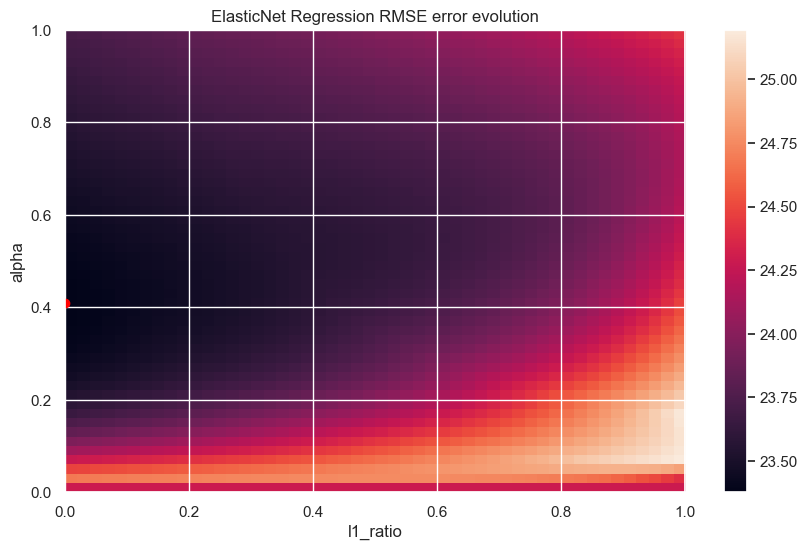

Ridge RMSE: 23.37822100873452
Lasso RMSE: 24.15246650762958
ElasticNet RMSE: 23.37825903123421


In [105]:
#Considere el conjunto de datos “Boston Housing Data” presentados en Harrison and Rubinfeld (1978). Defina como variable respuesta a la columna MEDV. 
# Realice una partición 80-20, donde el primer 80 % de los datos son datos de entrenamiento y el restante 20 % son datos para prueba.
from sklearn.model_selection import train_test_split
# Definir la variable respuesta (MEDV) y las variables predictoras
X = dfBoston.drop('MEDV', axis=1)
y = dfBoston['MEDV']

# Realizar la partición 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)

# We will use Ridge, Lasso and ElasticNet regression models in the training data. For each  model we will find the optimal alpha and lambda values and show the graph of the regression coefficients evolution.

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)

# Find the optimal alpha value for Ridge Regression using the RMSE error
alpha_space = np.logspace(-3, 3, 200)
ridge_scores = []
ridge_coefs = []

for alpha in alpha_space:
    ridge.alpha = alpha
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    ridge_scores.append(mean_squared_error(y_test, y_pred))
    ridge_coefs.append(ridge.coef_)

# Best ridge alpha
best_alpha_ridge = alpha_space[np.argmin(ridge_scores)]

# Plot the RMSE error evolution in a line plot
plt.plot(alpha_space, ridge_scores)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('Ridge Regression RMSE error evolution')
# Add a label in the lowest point of the graph with the alpha value
plt.text(alpha_space[np.argmin(ridge_scores)], np.min(ridge_scores), f'optimal alpha = {alpha_space[np.argmin(ridge_scores)]}', ha='center')
plt.show()

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)

# Find the optimal alpha value for Lasso Regression using the RMSE error
alpha_space = np.logspace(-4, 0, 200)
lasso_scores = []
lasso_coefs = []

for alpha in alpha_space:
    lasso.alpha = alpha
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    lasso_scores.append(mean_squared_error(y_test, y_pred))
    lasso_coefs.append(lasso.coef_)

# Best lasso alpha
best_alpha_lasso = alpha_space[np.argmin(lasso_scores)]

# Plot the RMSE error evolution in a line plot
plt.plot(alpha_space, lasso_scores)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('Lasso Regression RMSE error evolution')
# Add a label in the lowest point of the graph with the alpha value
plt.text(alpha_space[np.argmin(lasso_scores)], np.min(lasso_scores), f'optimal alpha = {alpha_space[np.argmin(lasso_scores)]}', ha='center')
plt.show()

# ElasticNet Regression
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)

# Find the optimal alpha and l1_ratio value for ElasticNet Regression using the RMSE error
alpha_space = np.linspace(0, 1, 50)
l1_ratio_space = np.linspace(0, 1, 50)
elasticnet_scores = []
elasticnet_coefs = []

for alpha in alpha_space:
    for l1_ratio in l1_ratio_space:
        elasticnet.alpha = alpha
        elasticnet.l1_ratio = l1_ratio
        elasticnet.fit(X_train, y_train)
        y_pred = elasticnet.predict(X_test)
        elasticnet_scores.append(mean_squared_error(y_test, y_pred))
        elasticnet_coefs.append(elasticnet.coef_)


# Plot the RMSE error evolution in a heatmap
elasticnet_scores = np.array(elasticnet_scores).reshape(50, 50)
plt.imshow(elasticnet_scores, origin='lower', extent=[l1_ratio_space.min(), l1_ratio_space.max(), alpha_space.min(), alpha_space.max()], aspect='auto')
plt.colorbar()
plt.xlabel('l1_ratio')
plt.ylabel('alpha')
plt.title('ElasticNet Regression RMSE error evolution')
# Show a marker in the lowest point of the heatmap with the optimal alpha and l1_ratio values
optimal_alpha_en, optimal_l1_ratio_en = np.unravel_index(np.argmin(elasticnet_scores), elasticnet_scores.shape)
# plt.scatter(l1_ratio_space[optimal_l1_ratio], alpha_space[optimal_alpha], color='red')
# plt.text(l1_ratio_space[optimal_l1_ratio], alpha_space[optimal_alpha], f'optimal alpha = {alpha_space[optimal_alpha]}\noptimal l1_ratio = {l1_ratio_space[optimal_l1_ratio]}', ha='center')
# Show a red dot in the lowest point of the heatmap
plt.scatter(l1_ratio_space[optimal_l1_ratio_en], alpha_space[optimal_alpha_en], color='red')
plt.show()

best_alpha_elasticnet = alpha_space[optimal_alpha_en]
best_l1_ratio_elasticnet = l1_ratio_space[optimal_l1_ratio_en]
# Compare the RMSE error of the three models with the optimal alpha and l1_ratios values
ridge.alpha = best_alpha_ridge
ridge.fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_test)
ridge_rmse = mean_squared_error(y_test, ridge_y_pred)

lasso.alpha = best_alpha_lasso
lasso.fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)
lasso_rmse = mean_squared_error(y_test, lasso_y_pred)

elasticnet.alpha = best_alpha_elasticnet
elasticnet.l1_ratio = best_l1_ratio_elasticnet
elasticnet.fit(X_train, y_train)
elasticnet_y_pred = elasticnet.predict(X_test)
elasticnet_rmse = mean_squared_error(y_test, elasticnet_y_pred)

print(f'Ridge RMSE: {ridge_rmse}')
print(f'Lasso RMSE: {lasso_rmse}')
print(f'ElasticNet RMSE: {elasticnet_rmse}')




Mejor alpha para Ridge: 164.46761779946627
Mejor alpha para Lasso: 0.7232633896483533
Mejor alpha para ElasticNet: 0.4081632653061224
Mejor l1_ratio para ElasticNet: 0.0


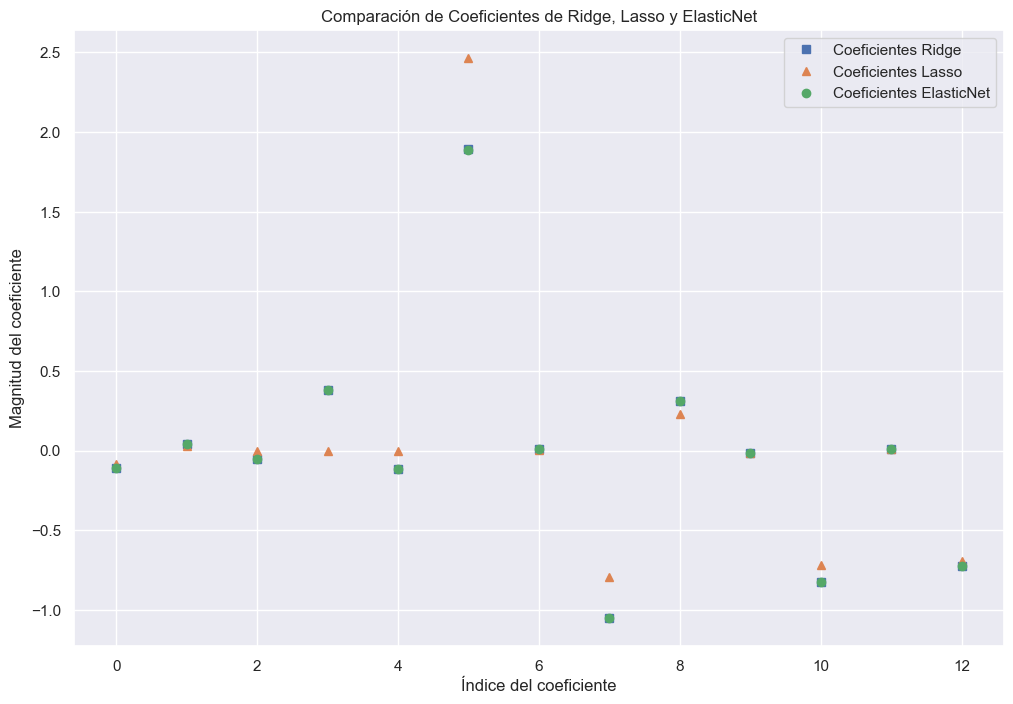

Coeficientes Ridge: [-0.11058331  0.03995816 -0.0520205   0.3794143  -0.11483231  1.89240276
  0.0071614  -1.05155008  0.309523   -0.0149496  -0.82269497  0.01159513
 -0.72621143]
Coeficientes Lasso: [-0.08569124  0.0306918  -0.          0.         -0.          2.46446297
  0.00662688 -0.79304525  0.22883202 -0.01268625 -0.71997462  0.01183225
 -0.692407  ]
Coeficientes ElasticNet: [-0.11057984  0.03995648 -0.05203145  0.37865156 -0.11449418  1.8896236
  0.0071983  -1.05104721  0.30956454 -0.01495086 -0.82267867  0.01159323
 -0.72639433]
Ecuación de regresión ajustada para Ridge:
y = 38.0329 + (-0.1106 * CRIM) + (0.0400 * ZN) + (-0.0520 * INDUS) + (0.3794 * CHAS) + (-0.1148 * NOX) + (1.8924 * RM) + (0.0072 * AGE) + (-1.0516 * DIS) + (0.3095 * RAD) + (-0.0149 * TAX) + (-0.8227 * PTRATIO) + (0.0116 * B) + (-0.7262 * LSTAT)

Ecuación de regresión ajustada para Lasso:
y = 30.3345 + (-0.0857 * CRIM) + (0.0307 * ZN) + (-0.0000 * INDUS) + (0.0000 * CHAS) + (-0.0000 * NOX) + (2.4645 * RM) + (0

In [106]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


# Ridge Regression
ridge_best_model = Ridge(alpha=best_alpha_ridge).fit(X_train, y_train)

# Lasso Regression
lasso_best_model = Lasso(alpha=best_alpha_lasso).fit(X_train, y_train)

# ElasticNet Regression
elastic_net_best_model = ElasticNet(alpha=best_alpha_elasticnet, l1_ratio=best_l1_ratio_elasticnet).fit(X_train, y_train)

# Imprimir los mejores parámetros
print("Mejor alpha para Ridge:", best_alpha_ridge)
print("Mejor alpha para Lasso:", best_alpha_lasso)
print("Mejor alpha para ElasticNet:", best_alpha_elasticnet)
print("Mejor l1_ratio para ElasticNet:", best_l1_ratio_elasticnet)

# Comparar coeficientes
ridge_coefs = ridge_best_model.coef_
lasso_coefs = lasso_best_model.coef_
elastic_net_coefs = elastic_net_best_model.coef_

# Graficar los coeficientes
plt.figure(figsize=(12, 8))
plt.plot(ridge_coefs, 's', label='Coeficientes Ridge')
plt.plot(lasso_coefs, '^', label='Coeficientes Lasso')
plt.plot(elastic_net_coefs, 'o', label='Coeficientes ElasticNet')
plt.xlabel('Índice del coeficiente')
plt.ylabel('Magnitud del coeficiente')
plt.legend()
plt.title('Comparación de Coeficientes de Ridge, Lasso y ElasticNet')
plt.show()

# Interpretación
print("Coeficientes Ridge:", ridge_coefs)
print("Coeficientes Lasso:", lasso_coefs)
print("Coeficientes ElasticNet:", elastic_net_coefs)

# Escribir la ecuación ajustada de regresión para cada modelo
def regression_equation(model, feature_names):
    intercept = model.intercept_
    coefs = model.coef_
    equation = f"y = {intercept:.4f}"
    for coef, feature in zip(coefs, feature_names):
        equation += f" + ({coef:.4f} * {feature})"
    return equation

feature_names = X.columns

ridge_equation = regression_equation(ridge_best_model, feature_names)
lasso_equation = regression_equation(lasso_best_model, feature_names)
elastic_net_equation = regression_equation(elastic_net_best_model, feature_names)

print("Ecuación de regresión ajustada para Ridge:")
print(ridge_equation)
print("\nEcuación de regresión ajustada para Lasso:")
print(lasso_equation)
print("\nEcuación de regresión ajustada para ElasticNet:")
print(elastic_net_equation)

### Conclusiones
- Se observa que la regresión optimizada de Lasso utiliza por lo general magnitudes mayores para los distintos coeficients
- Las magnitudes seleccionadas por Ridge y Elastic Net presentan valores muy similares
- El RMSE de Ridge y Elastic Net es muy similar y de un valor menor a Lasso. Esto se debe a que la optimización indicó un valor de 0 para la regularización L1 lo cual traduce a que Lasso tenga muy poca influencia. En este caso, Elastic-Net se aproxima a Ridge, utilizando solo regularización L2.
- No se evidencia una diferencia significativa entre la capacidad predictiva (RMSE) entre Ridge y Elastic-Net. Sin embargo, por la menor complejidad a la hora de entrenar y optimizar el modelo de Ridge, se recomienda el uso de este para el problema presente de Housing.

# Ejercicio 2

2)	El conjunto de datos *“YearPredictionMSD”* contiene información sobre canciones de música po- pular y el año en que se grabaron. Incluye 515345 observaciones y 90 características, como la intensidad media del sonido, la varianza del espectro de frecuencia y la correlación entre las características espectrales. El objetivo es predecir el año en que se grabó la canción.
* Carque el conjunto de datos usando la función *read_csv *del paquete **pandas** y el como primer argumento el Link, use como segundo argumendo *header = None*.
* Divida el conjunto de datos en características o variables explicativas X y variable objetivo Y, tenga en cuenta que se quiere modelar el año en que se grabó la canción.
* Reduzca la dimensión de las variables. Para ello, use un modelo de regresión **LASSO** con un coeficiente de penalización de 10, para extraer características importantes del conjunto de variables explicativas.
* Con el conjunto de variables reducido, ajuste un modelo de regresión OLS e interprete su
significancia y su R2 .
* Revise los supuestos de los errores, y con los hallazgos del ítem anterior, concluya sobre la conveniencia de usar este modelo para predecir el año de grabación de la canción.


In [107]:
# Instead of using load_boston, fetch the dataset directly from the source:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
dfYearPredMSD = pd.read_csv(data_url, header=None)

# Ejercicio 3

3)	El conjunto de datos conocido como *“California Housing Dataset”* puede ser cargado del paquete **sklearn**. La variable objetivo es el valor medio de la vivienda para los distritos de California, expresado en cientos de miles de dólares ($100000). Este conjunto de datos se derivó del censo de EE.UU. de 1990, usando como unidad de censo el grupo de bloques. Un grupo de bloques es la unidad geográfica más pequeña para la que La Oficina del Censo de EE.UU. publica datos de muestra (un grupo de bloque generalmente tiene una población de 600 a 3000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el promedio. El número de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas

columnas pueden tomar valores sorprendentemente grandes para grupos de bloques con pocos hogares y muchas casas vacías, como centros vacacionales.
* Lea el conjunto de datos usando la función f**etch_california_housing **del paquete **sklearn.datasets**, guardelos en una variable llamada **california_housing **y con el co- mando *print(california_housing.DESCR)* observe la descripción general del dataset y en especial qué es cada una de las variables de entrada.
* Separe las variables explicativas X de la variable respuesta Y, para acceder a ellas use los comandos *california_housing.data* y *california_housing.target*. Considere la conveniencia de incluir las variables Longitud y Latitud al modelo. Haga un análisis exploratorio de las correlaciones entre las variables y comente al respecto.
* Ajuste un modelo de regresión **Elastic-Net** con un coeficiente de penalización pequeño, iterativamente ajuste este valor para eliminar variables explicativas y corregir el problema de multicolinealidad, en cada iteración calcule las correlaciones de las variables explicativas y pare cuando no se encuentren correlaciones altas.


In [108]:
from sklearn.datasets import fetch_california_housing
dfHousing = fetch_california_housing()
print(dfHousing.data.shape, dfHousing.target.shape)
print(dfHousing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


# Ejercicio 4

4)	El fichero de datos *“Dengue_Data.xlsx”* contiene información epidemiológica de los casos de Den- gue en el Departamento de Antioquia. Estos datos contienen tanto información socio-económica como clínica de las personas que resultaron infectadas y desarrollaron Dengue o Dengue Hemo- rrágico. Para una completa descripción de los datos y/o fenómeno estudiado, remítase al siguiente artículo *Identification of Hazard and Socio-Demographic Patterns of Dengue Infections in a Co- lombian Subtropical Region from 2015 to 2020: Cox Regression Models and Statistical Analysis. Realizar*.

* Utilizando solo las variables socio-demográficas, ajuste un modelo Logit y los modelos Logit- Ridge, Logit-LASSO y Logit-Enet (con sus parámetros óptimos, por supuesto) para predecir si una persona va a desarrollar “DENGUE” o “DENGUE GRAVE”. Interprete los resultados de cada modelo y compárelos; defina que variables son las más importantes par predecir el estado categórico modelado, muestre los gráficos de penalidad y de evolución de coeficientes. * Concluya sobre el fenómeno estudiado y a información del artículo.
* Realice el mismo ejercicio anterior, solo que ahora considere como variables explicativas las variables de tipo clínico/médico para modelar si una persona requiere o no ser hospitali- zada. Realice los mismos análisis y procedimientos. Concluya en función de la información presentada en el artículo.


In [109]:
url = 'https://github.com/cam2149/MachinelearningI/raw/19a9b08e636dd80915a4727c674a04c64a962b59/Dengue_Data.xlsx'
dfDengue = pd.read_excel(url, sheet_name='datos_2')

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.